In [ ]:
%matplotlib inline


# Logistic Regression Example


Computes path on IRIS dataset.




Automatically created module for IPython interactive environment
Computing regularization path ...
Running time  0:00:00.037826


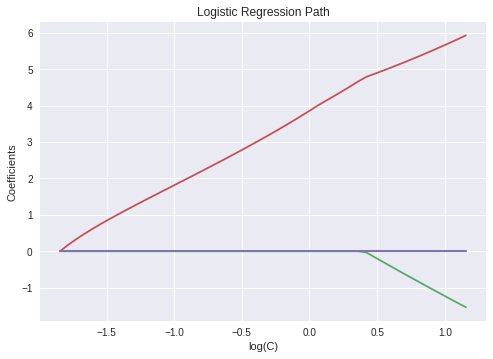

In [3]:

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X -= np.mean(X, 0)

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)

print("Computing regularization path ...")
start = datetime.now()
clf = linear_model.LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("Running time ", datetime.now() - start)

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()
print(__doc__)